In [1]:
import polars as pl
import pandas as pd
import numpy as np
import pyarrow

import matplotlib.pyplot as plt
import seaborn as sns


# Download Dataset or run in a kaggle notebook
# https://www.kaggle.com/datasets/mkechinov/ecommerce-behavior-data-from-multi-category-store
df = pl.read_csv("nov2019.csv")

In the previous video I covered `select`, `filter`, a few basic operations.

# How to update columns and intro to window functions

In [2]:
df.head()

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
str,str,i64,i64,str,str,f64,i64,str
"""2019-11-01 00:…","""view""",1003461,2053013555631882655,"""electronics.sm…","""xiaomi""",489.07,520088904,"""4d3b30da-a5e4-…"
"""2019-11-01 00:…","""view""",5000088,2053013566100866035,"""appliances.sew…","""janome""",293.65,530496790,"""8e5f4f83-366c-…"
"""2019-11-01 00:…","""view""",17302664,2053013553853497655,null,"""creed""",28.31,561587266,"""755422e7-9040-…"
"""2019-11-01 00:…","""view""",3601530,2053013563810775923,"""appliances.kit…","""lg""",712.87,518085591,"""3bfb58cd-7892-…"
"""2019-11-01 00:…","""view""",1004775,2053013555631882655,"""electronics.sm…","""xiaomi""",183.27,558856683,"""313628f1-68b8-…"


In [3]:
df.shape

(28, 9)

### 1. Update values on one or multiple columns

In [4]:
df_top = df.head()
df_top

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
str,str,i64,i64,str,str,f64,i64,str
"""2019-11-01 00:…","""view""",1003461,2053013555631882655,"""electronics.sm…","""xiaomi""",489.07,520088904,"""4d3b30da-a5e4-…"
"""2019-11-01 00:…","""view""",5000088,2053013566100866035,"""appliances.sew…","""janome""",293.65,530496790,"""8e5f4f83-366c-…"
"""2019-11-01 00:…","""view""",17302664,2053013553853497655,null,"""creed""",28.31,561587266,"""755422e7-9040-…"
"""2019-11-01 00:…","""view""",3601530,2053013563810775923,"""appliances.kit…","""lg""",712.87,518085591,"""3bfb58cd-7892-…"
"""2019-11-01 00:…","""view""",1004775,2053013555631882655,"""electronics.sm…","""xiaomi""",183.27,558856683,"""313628f1-68b8-…"


In [5]:
# Update a string column
df_top.with_columns(
    ("brand-" + pl.col("brand")).alias("brand2")
)

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,brand2
str,str,i64,i64,str,str,f64,i64,str,str
"""2019-11-01 00:…","""view""",1003461,2053013555631882655,"""electronics.sm…","""xiaomi""",489.07,520088904,"""4d3b30da-a5e4-…","""brand-xiaomi"""
"""2019-11-01 00:…","""view""",5000088,2053013566100866035,"""appliances.sew…","""janome""",293.65,530496790,"""8e5f4f83-366c-…","""brand-janome"""
"""2019-11-01 00:…","""view""",17302664,2053013553853497655,null,"""creed""",28.31,561587266,"""755422e7-9040-…","""brand-creed"""
"""2019-11-01 00:…","""view""",3601530,2053013563810775923,"""appliances.kit…","""lg""",712.87,518085591,"""3bfb58cd-7892-…","""brand-lg"""
"""2019-11-01 00:…","""view""",1004775,2053013555631882655,"""electronics.sm…","""xiaomi""",183.27,558856683,"""313628f1-68b8-…","""brand-xiaomi"""


In [6]:
# Update a numeric column
df_top.with_columns([
    ("brand-" + pl.col("brand")).alias("brand2"),
    (pl.col("price") * 100).alias("price2")
])

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,brand2,price2
str,str,i64,i64,str,str,f64,i64,str,str,f64
"""2019-11-01 00:…","""view""",1003461,2053013555631882655,"""electronics.sm…","""xiaomi""",489.07,520088904,"""4d3b30da-a5e4-…","""brand-xiaomi""",48907.0
"""2019-11-01 00:…","""view""",5000088,2053013566100866035,"""appliances.sew…","""janome""",293.65,530496790,"""8e5f4f83-366c-…","""brand-janome""",29365.0
"""2019-11-01 00:…","""view""",17302664,2053013553853497655,null,"""creed""",28.31,561587266,"""755422e7-9040-…","""brand-creed""",2831.0
"""2019-11-01 00:…","""view""",3601530,2053013563810775923,"""appliances.kit…","""lg""",712.87,518085591,"""3bfb58cd-7892-…","""brand-lg""",71287.0
"""2019-11-01 00:…","""view""",1004775,2053013555631882655,"""electronics.sm…","""xiaomi""",183.27,558856683,"""313628f1-68b8-…","""brand-xiaomi""",18327.0


In [7]:
# Create a column with a constant (based on the mean) 
df_top.select([
    pl.all(),
    pl.col("price").mean().alias("price_avg")    
])

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,price_avg
str,str,i64,i64,str,str,f64,i64,str,f64
"""2019-11-01 00:…","""view""",1003461,2053013555631882655,"""electronics.sm…","""xiaomi""",489.07,520088904,"""4d3b30da-a5e4-…",341.434
"""2019-11-01 00:…","""view""",5000088,2053013566100866035,"""appliances.sew…","""janome""",293.65,530496790,"""8e5f4f83-366c-…",341.434
"""2019-11-01 00:…","""view""",17302664,2053013553853497655,null,"""creed""",28.31,561587266,"""755422e7-9040-…",341.434
"""2019-11-01 00:…","""view""",3601530,2053013563810775923,"""appliances.kit…","""lg""",712.87,518085591,"""3bfb58cd-7892-…",341.434
"""2019-11-01 00:…","""view""",1004775,2053013555631882655,"""electronics.sm…","""xiaomi""",183.27,558856683,"""313628f1-68b8-…",341.434


### 2. Update values based on window function

- In pandas this is done with `transform`. In R's dplyr with `mutate`. 
- The idea is we update values of a column BY a group and the new column has the same size of the original dataframe.
- The over() call defines the group we are interested in

In [8]:
df.head()

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
str,str,i64,i64,str,str,f64,i64,str
"""2019-11-01 00:…","""view""",1003461,2053013555631882655,"""electronics.sm…","""xiaomi""",489.07,520088904,"""4d3b30da-a5e4-…"
"""2019-11-01 00:…","""view""",5000088,2053013566100866035,"""appliances.sew…","""janome""",293.65,530496790,"""8e5f4f83-366c-…"
"""2019-11-01 00:…","""view""",17302664,2053013553853497655,null,"""creed""",28.31,561587266,"""755422e7-9040-…"
"""2019-11-01 00:…","""view""",3601530,2053013563810775923,"""appliances.kit…","""lg""",712.87,518085591,"""3bfb58cd-7892-…"
"""2019-11-01 00:…","""view""",1004775,2053013555631882655,"""electronics.sm…","""xiaomi""",183.27,558856683,"""313628f1-68b8-…"


In [9]:
df.with_columns([
    pl.col("price").mean().over("category_code").alias("price_by_categorycode")
]).head(10)

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,price_by_categorycode
str,str,i64,i64,str,str,f64,i64,str,f64
"""2019-11-01 00:…","""view""",1003461,2053013555631882655,"""electronics.sm…","""xiaomi""",489.07,520088904,"""4d3b30da-a5e4-…",445.118333
"""2019-11-01 00:…","""view""",5000088,2053013566100866035,"""appliances.sew…","""janome""",293.65,530496790,"""8e5f4f83-366c-…",293.65
"""2019-11-01 00:…","""view""",17302664,2053013553853497655,null,"""creed""",28.31,561587266,"""755422e7-9040-…",29.611667
"""2019-11-01 00:…","""view""",3601530,2053013563810775923,"""appliances.kit…","""lg""",712.87,518085591,"""3bfb58cd-7892-…",712.87
"""2019-11-01 00:…","""view""",1004775,2053013555631882655,"""electronics.sm…","""xiaomi""",183.27,558856683,"""313628f1-68b8-…",445.118333
"""2019-11-01 00:…","""view""",1306894,2053013558920217191,"""computers.note…","""hp""",360.09,520772685,"""816a59f3-f5ae-…",428.746667
"""2019-11-01 00:…","""view""",1306421,2053013558920217191,"""computers.note…","""hp""",514.56,514028527,"""df8184cc-3694-…",428.746667
"""2019-11-01 00:…","""view""",15900065,2053013558190408249,null,"""rondell""",30.86,518574284,"""5e6ef132-4d7c-…",29.611667
"""2019-11-01 00:…","""view""",12708937,2053013553559896355,null,"""michelin""",72.72,532364121,"""0a899268-31eb-…",29.611667


In [10]:
# now I can compute the difference between the price and the category average.
df_cat_window = df.select([
    pl.col("category_code"),
    pl.col("price"),
    pl.col("price").mean().over("category_code").alias("price_by_category"),
    (pl.col("price") / pl.col("price").mean().over("category_code") - 1).alias("price_div_cat_average")
])
df_cat_window.head()

category_code,price,price_by_category,price_div_cat_average
str,f64,f64,f64
"""electronics.sm…",489.07,445.118333,0.098742
"""appliances.sew…",293.65,293.65,0.0
null,28.31,29.611667,-0.043958
"""appliances.kit…",712.87,712.87,0.0
"""electronics.sm…",183.27,445.118333,-0.588267


In [12]:
df_cat_window_sample = df_cat_window.sample(28).to_pandas()

<Axes: >

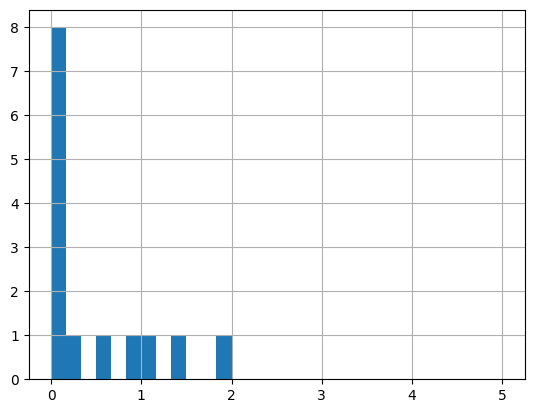

In [13]:
df_cat_window_sample.price_div_cat_average.hist(bins=30, range=[0, 5])

In [14]:
df_cat_window_sample.dtypes

category_code             object
price                    float64
price_by_category        float64
price_div_cat_average    float64
dtype: object

In [15]:
df_cat_window_sample.head()

,category_code,price,price_by_category,price_div_cat_average
0,electronics.smartphone,489.07,445.118333,0.098742
1,appliances.sewing_machine,293.65,293.650000,0.000000
2,None,28.31,29.611667,-0.043958
3,appliances.kitchen.washer,712.87,712.870000,0.000000
4,electronics.smartphone,183.27,445.118333,-0.588267


In [16]:
df_cat_window_sample.price_div_cat_average.quantile(np.arange(0, 1.1, 0.1))

0.0   -0.963190
0.1   -0.720988
0.2   -0.618541
0.3   -0.299128
0.4   -0.152092
0.5   -0.020008
0.6    0.000000
0.7    0.037941
0.8    0.180122
0.9    0.947886
1.0    1.999156
Name: price_div_cat_average, dtype: float64

In [17]:
df_cat_window_sample[df_cat_window_sample.price_div_cat_average > 10].sort_values("price_div_cat_average", ascending=False)

,category_code,price,price_by_category,price_div_cat_average
